In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Accord = pd.read_excel('AccordHotel.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Axa = pd.read_excel('Axa.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
BNP = pd.read_excel('BNP.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Casino = pd.read_excel('Casino.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
ENGI = pd.read_excel('ENGI.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
LVMH = pd.read_excel('LVMH.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Orange = pd.read_excel('Orange.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Peugeot = pd.read_excel('Peugeot.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Renault = pd.read_excel('Renault.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Total = pd.read_excel('Total.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Veolia = pd.read_excel('Veolia.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Vivendi = pd.read_excel('Vivendi.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])

datas = [Accord, Axa, BNP, Casino, ENGI, LVMH, Orange, Peugeot, Renault, Total, Veolia, Vivendi]

In [3]:
for i in range(len(datas)):
    datas[i]['R'] = np.nan
    for j in range(254):
        datas[i]['R'].iloc[j] = (datas[i]['low'].iloc[j+1] + datas[i]['high'].iloc[j+1])/(datas[i]['low'].iloc[j] + datas[i]['high'].iloc[j]) - 1

ER = [np.mean(datas[i]['R']) for i in range(len(datas))]

ER


C:\Users\user\AppData\Local\Temp\ipykernel_10176\2865213390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas[i]['R'].iloc[j] = (datas[i]['low'].iloc[j+1] + datas[i]['high'].iloc[j+1])/(datas[i]['low'].iloc[j] + datas[i]['high'].iloc[j]) - 1


[-0.0006401792778455088,
 -0.0010525263114721855,
 -0.001829743349972335,
 -0.0013104455101185235,
 -0.000492563944316347,
 0.00025878178177848724,
 -8.334380139173682e-05,
 0.00035640289946057446,
 -0.0017154854383169872,
 7.791569222361497e-06,
 -0.0006615667317761678,
 -0.00024007184962658568]

In [4]:
cov_matrix = np.zeros((len(datas), len(datas)))
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        S = 0
        for k in range(254):
            S += (datas[i]['R'].iloc[k] - ER[i])*(datas[j]['R'].iloc[k] - ER[j])
        S = S/255
        cov_matrix[i][j] = S

cov_matrix

array([[9.93061562e-05, 4.10123137e-05, 5.56113440e-05, 5.12767128e-05,
        3.70338570e-05, 6.19118602e-05, 2.92500913e-05, 5.24098169e-05,
        5.69902762e-05, 3.66863261e-05, 3.56065154e-05, 4.17721871e-05],
       [4.10123137e-05, 1.29284024e-04, 8.82035702e-05, 5.71248976e-05,
        3.80591592e-05, 5.83462076e-05, 2.88977371e-05, 7.01146250e-05,
        6.49572619e-05, 4.86001696e-05, 2.99004409e-05, 4.66772558e-05],
       [5.56113440e-05, 8.82035702e-05, 1.41397431e-04, 7.51848291e-05,
        4.00337056e-05, 6.77862092e-05, 3.87055208e-05, 8.73956718e-05,
        7.84192036e-05, 5.33605130e-05, 3.54829989e-05, 5.89058435e-05],
       [5.12767128e-05, 5.71248976e-05, 7.51848291e-05, 4.01701650e-04,
        3.23651532e-05, 4.59321793e-05, 4.53507461e-05, 6.86245567e-05,
        8.91052524e-05, 3.83543726e-05, 3.45380287e-05, 3.95634283e-05],
       [3.70338570e-05, 3.80591592e-05, 4.00337056e-05, 3.23651532e-05,
        1.08496745e-04, 5.72283193e-05, 3.83155108e-05, 4.61

In [5]:
detCovMat = np.linalg.det(cov_matrix)
detCovMat

1.6665819157577434e-48

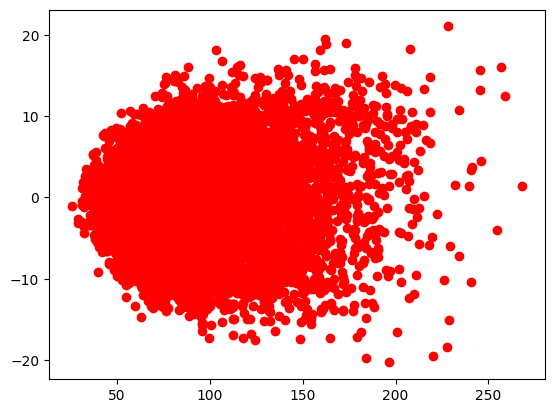

In [11]:
AX1 = []
AX2 = []

for i in range(10000):
    x = np.zeros((12,1))
    for j in range(11):
        x[j] = 2*np.random.randn()
    x[11] = 1 - np.sum(x)
    varia = np.dot(np.transpose(x), np.dot(cov_matrix,x))
    stdev = np.sqrt(varia)
    AX1.append(1000*stdev)
    Esp = np.dot(np.transpose(x), ER)
    AX2.append(1000*Esp)

graph = plt.scatter(AX1, AX2, color = 'red')
plt.show()
